In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing dataset
dataset = pd.read_csv(r'D:/project/diabetes/diabetes.csv')
X = dataset.iloc[:,0:8].values
Y = dataset.iloc[:, 8].values

In [3]:
#dimensions of dataset
print(dataset.shape)

(768, 9)


In [4]:
#statistical summary
print(dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

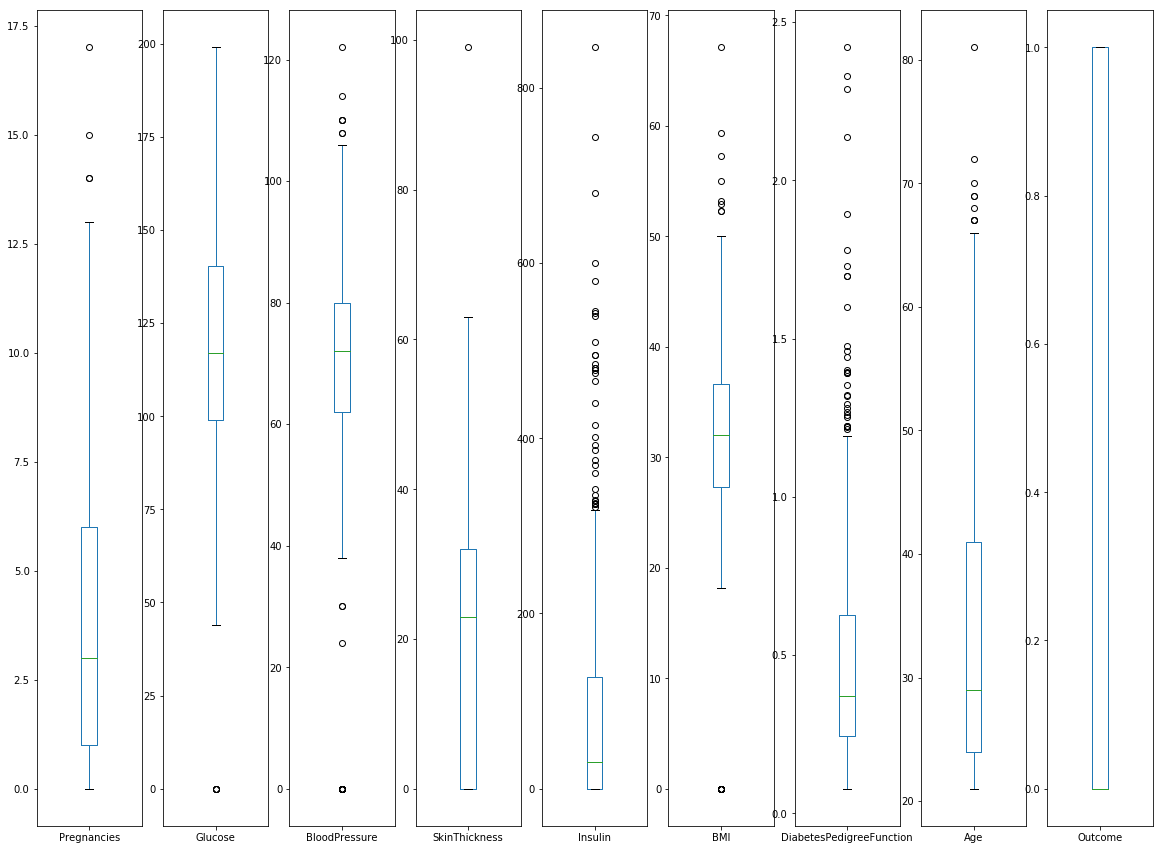

In [5]:
# DATA VISUALISATION

plt.rcParams['figure.figsize'] = (20,15)  #THIS IS USED TO ENLARGE THE GRAPHS
dataset.plot(kind='box', subplots=True,  sharex=False, sharey=False)
plt.show()

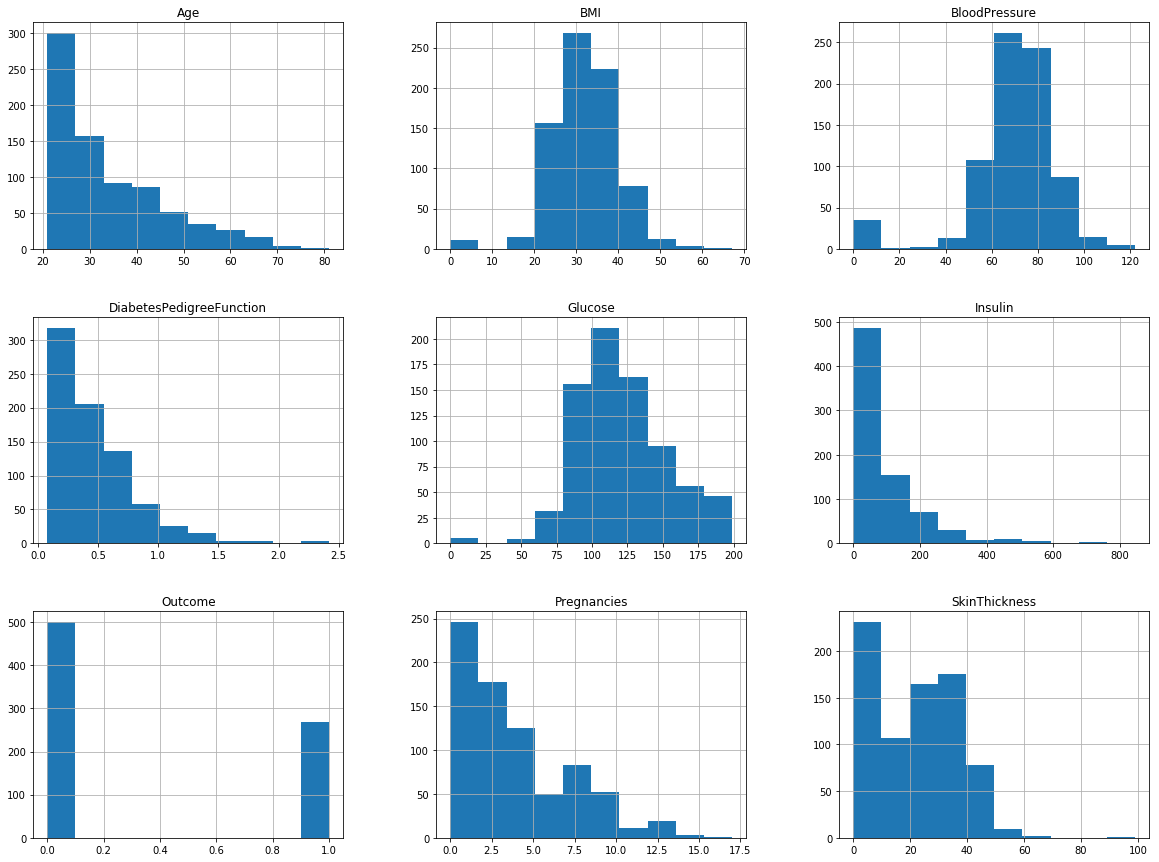

In [6]:
# Bar graphs
dataset.hist()
plt.show()

In [7]:

# Spot Check Algorithms
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
models = []
models.append(('LR', LinearRegression()))
models.append(('LGR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVR',SVR()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('GP', GaussianProcessRegressor()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold,)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.258030 (0.118302)
LGR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.695301 (0.064021)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)
RF: 0.734296 (0.057371)
SVR: -0.037690 (0.086646)
KNN: 0.726555 (0.061821)
GP: -0.553496 (0.158881)


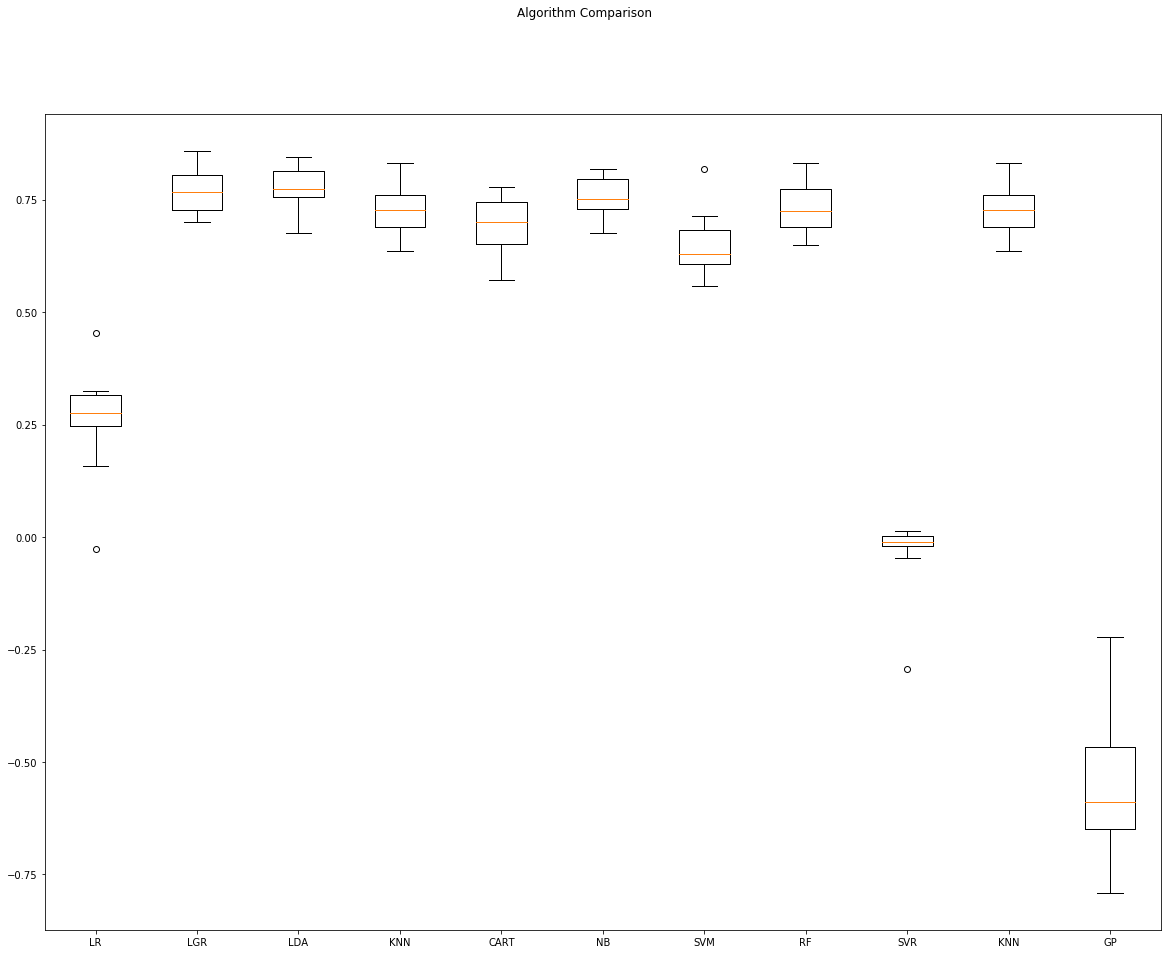

In [8]:
# Plot comparision between algos
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [10]:
# splitting data into training and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, train_size = 0.2, random_state = 0)



In [11]:
# Applying Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
#Prediction
Y_pred = classifier.predict(X_test)

In [13]:
# Making confusion matrics and checking accuracy again
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred))

0.7544715447154472


In [14]:
cm


array([[363,  33],
       [118, 101]], dtype=int64)